## Introduction


A Retail company wants to understand purchasing behaviour of its customers during black friday to create personlized deals and recommendations.
Different python libraries such as numpy, pandas, matplotlib and sea born was used for statistical analysis and visualizations 

The dataset for this project was pickeup up from [Kaggle](https://www.kaggle.com/karinne/black-friday#test.csv)


### Importing libraries 

In [109]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as py
import seaborn as sns

### Data Gathering & Description

In [110]:
df = pd.read_csv('D:/Users/Swati/Desktop/Projects/Black Friday/Black_Friday.csv')

#Checking the head of the data frame
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Check the info of the dataframe

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Finding all number of unique values for all the columns in the dataframe

In [112]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [113]:
# For married status is 1, and unmarried status is 0
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [114]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [115]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [116]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [117]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [118]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [119]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

### Let us now try to find out if there exists any missing values in the data

In [120]:
total_missing = df.isnull().sum().sort_values(ascending=False)
total_missing

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [121]:
#Percent missing count
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)*100
percent_missing

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [122]:
#Concatenating both the tables to get the total missing count by percentage
missing= pd.concat([total_missing, percent_missing], axis=1, join='outer',keys=['Total missing count', 'Percentage '])
missing

,Total missing count,Percentage
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000
Gender,0,0.000000


69% of missing data is in Product Category 3 and 31% in Product Category 2. 

We will drop the values for better analysis


### Dropping missing values

In [123]:
#Dropping missing data
df.dropna(0, inplace=True)

In [124]:
# Validating our result
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Now the data has been cleaned and we can perform our Exploratory data analysis on the feautures

Lets visualize which gender category is more likely to spend on black friday sales

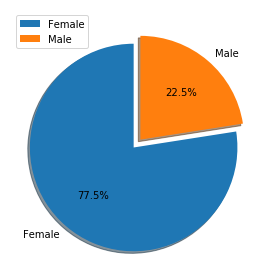

In [125]:
py.pie(df['Gender'].value_counts(),labels=['Female','Male'],explode=(0.1,0),
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
py.tight_layout()
py.legend()
py.show()

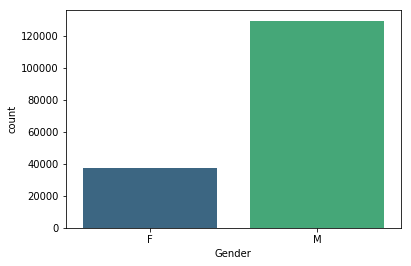

In [126]:
sns.countplot(x = 'Gender', data = df, palette='viridis' )

 Above plots shows that men spend more during Black Friday than women

### Let us now view which age group is more likely to spend during black friday sale

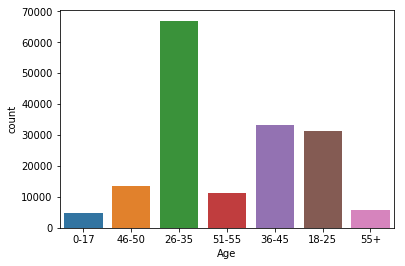

In [127]:
sns.countplot(df['Age'])

The above plot shows that age group between 26-35 are active buyers during black friday sales

### Now let us narrow down our age group buying behaviour by gender

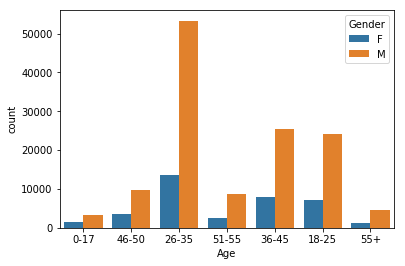

In [128]:
sns.countplot(df['Age'], hue=df['Gender'])

The above plot shows that males with age group between 26-35 spend more during black friday than females which is quite contradictory to the myth that females spend more.
Intresting!!!

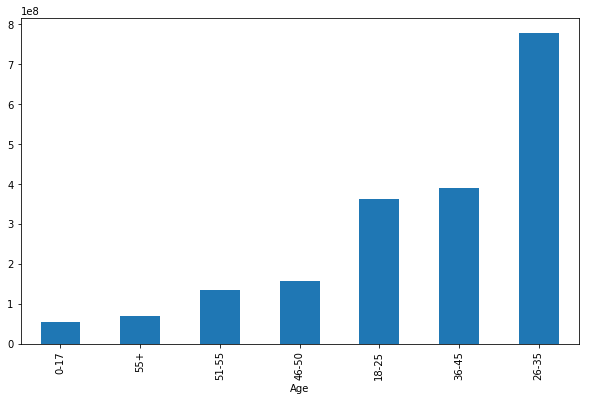

In [129]:
py.figure(figsize=[10,6])
df.groupby('Age')['Purchase'].sum().sort_values().plot('bar')

The above plot indicates that the highest buyers is in the age group of 26-35 which could be due to the fact that the individuals have jobs and can afford to pay of things.
Whereas the 0-17 age group shows least number of buyers as they are small kids who might not be interested in purchasing or teenagers who might not get sufficent pockemoney to spend it on products.

### Let us now find out the marital status of people who spend more during Black Friday

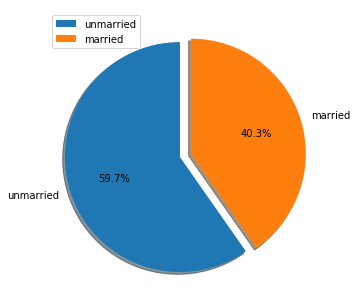

In [130]:
py.figure(figsize=[5,5])
py.pie(df['Marital_Status'].value_counts(),labels=['unmarried','married', ],explode=(0.1,0),
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
py.tight_layout()
py.legend()
py.show()


The above pie plot indicates that unmarried people spend more during black friday than married couples. This can be attributed to the fact that married people have responsiblity towards their partner and childern and thus are cautious about their spendings and future savings.

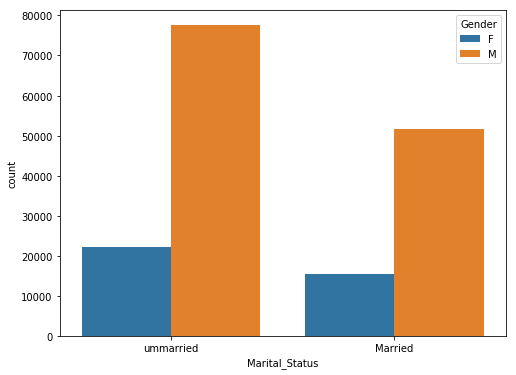

In [131]:
df['Marital_Status']=df['Marital_Status'].replace(1, 'Married')
df['Marital_Status']=df['Marital_Status'].replace(0, 'ummarried')
py.figure(figsize=[8,6])
sns.countplot(df['Marital_Status'], hue=df['Gender'])


Yet again the above plot revisits the fact that males shop more(unmarried or married) than females!
Myth busting facts!

### Let us now interpert geographic location of individuals who shop more

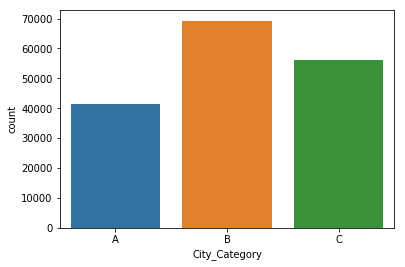

In [132]:
sns.countplot(df['City_Category'])

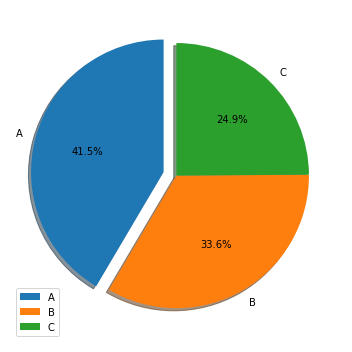

In [133]:
py.figure(figsize=[5,5])
py.pie(df['City_Category'].value_counts(),labels=['A', 'B', 'C'],
        explode=(0.1,0,0),
        shadow=True,
        startangle=90,
       autopct='%1.1f%%')
py.tight_layout()
py.legend()
py.show()

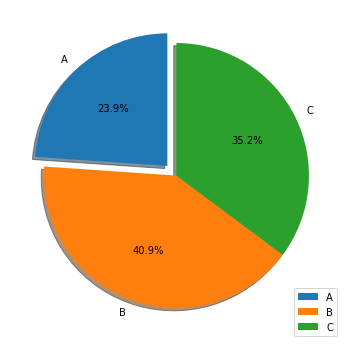

In [134]:
py.figure(figsize=[5,5])
py.pie(df.groupby('City_Category')['Purchase'].sum(),labels=df['City_Category'].unique(),
        explode=(0.1,0,0),
        shadow=True,
        startangle=90,
       autopct='%1.1f%%')
py.tight_layout()
py.legend()
py.show()

People who are located in location B are spending more during black friday

Now, let us showcase who these people are and what are their age groups

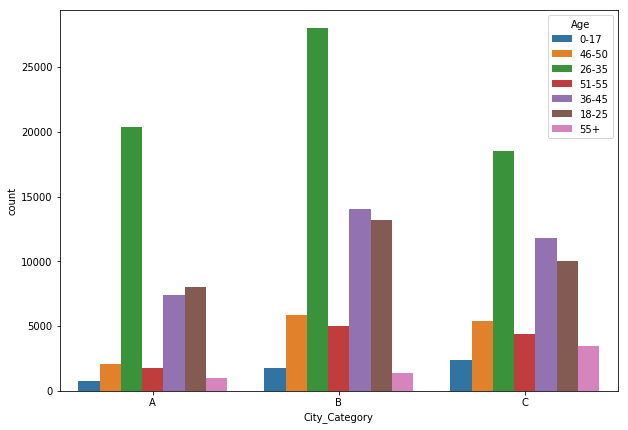

In [135]:
py.figure(figsize=[10,7])
sns.countplot(df['City_Category'], hue = df['Age'])

It is evident from the above plot that people with the age group of 26-35 spend most in City B and 0-17 spend least



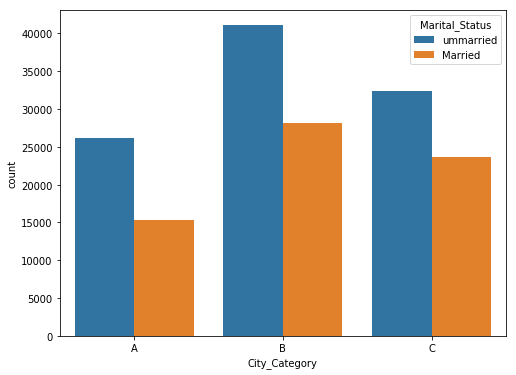

In [136]:
py.figure(figsize=[8,6])
sns.countplot(df['City_Category'], hue=df['Marital_Status'])

The above visualization shows that unmarried people from city B spend most during black friday

### Let's now viusalize the new and old new customer's ratio

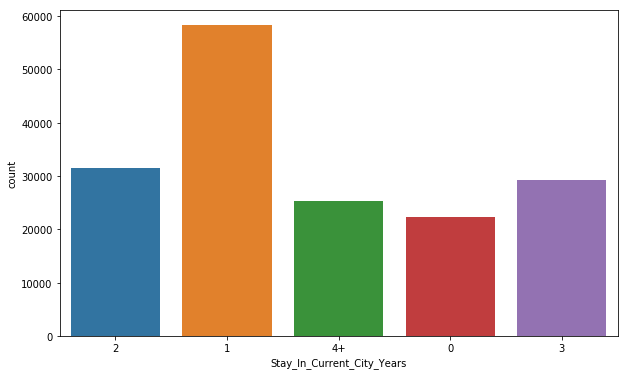

In [138]:
py.figure(figsize=[10,6])
sns.countplot(df['Stay_In_Current_City_Years'])

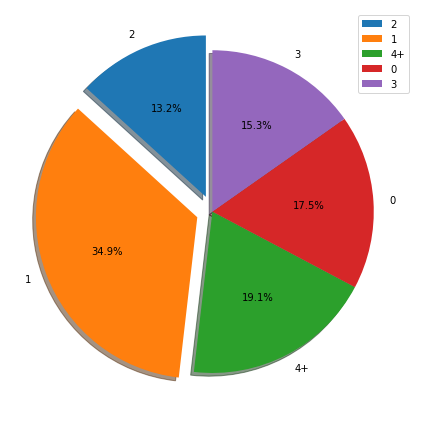

In [139]:
py.figure(figsize=[6,6])
py.pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(), labels = df['Stay_In_Current_City_Years'].unique(),
       explode = (0.1,0.1,0,0,0),
       shadow = True,
       startangle=90,
       autopct='%1.1f%%')
py.tight_layout()
py.legend()
py.show()
       

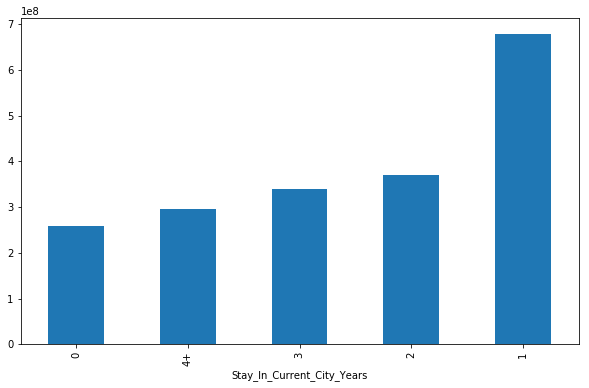

In [142]:
py.figure(figsize=[10,6])
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().sort_values().plot('bar')


Above plots show that people who are newly shifted to this city spend more on Black Friday sales. It's a good choice to buy all that home related stuff at cheaper rates on Black Friday! It also shows that people who are staying as guest in this city are less likey to spend money on sales like Black Friday.

### Let's visualize occupation of people who spend more during black friday sale

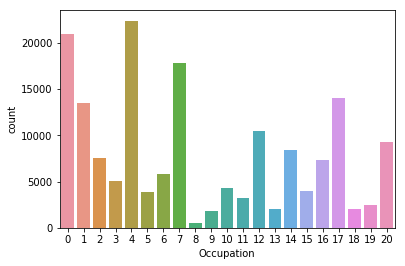

In [143]:
sns.countplot(df['Occupation'])

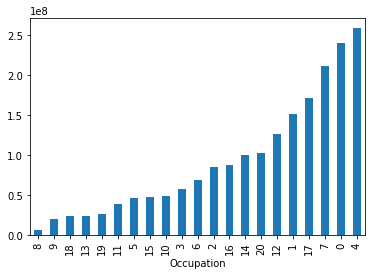

In [144]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot('bar')

The above graphs show that people who are from occupation 4 tend to spend most during Black Friday

<i> Let's group by the occupation status based on their marital status

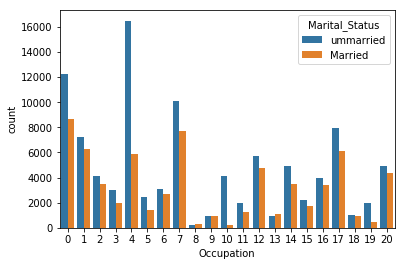

In [146]:
sns.countplot(df['Occupation'], hue = df['Marital_Status'])

### Let's see product categories people buy most during black friday 

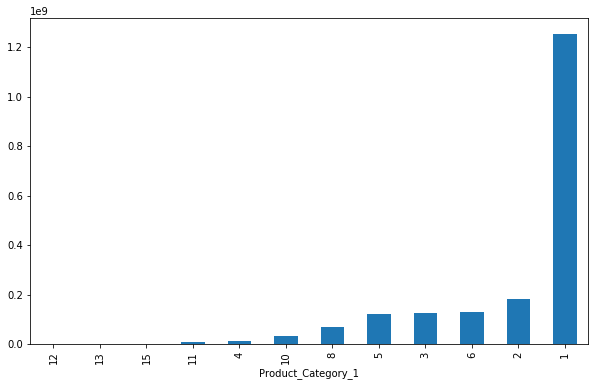

In [150]:
py.figure(figsize=[10,6])

df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot('bar')

In this category, people are looking to buy product 1

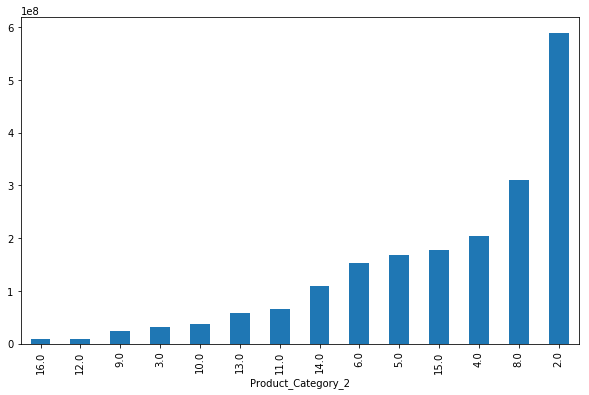

In [151]:
py.figure(figsize=[10,6])

df.groupby('Product_Category_2')['Purchase'].sum().sort_values().plot('bar')

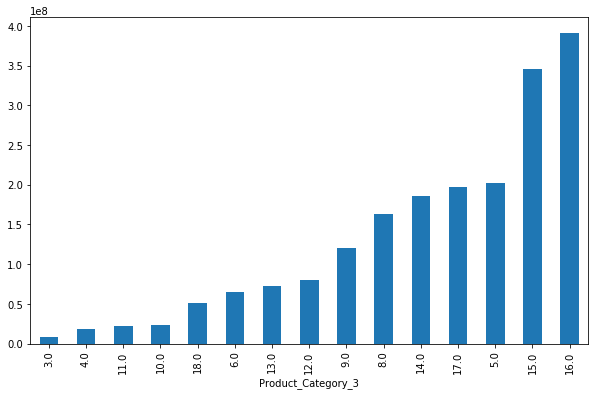

In [152]:
py.figure(figsize=[10,6])

df.groupby('Product_Category_3')['Purchase'].sum().sort_values().plot('bar')

In this, people spend more on purchasing product 15 and 16

<i> Let's explore most demanding products based on their product categories

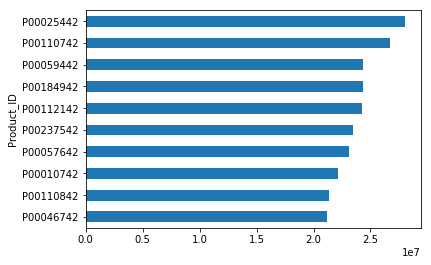

In [156]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot('barh')

Above illustration shows that, products with Id's P00025442 AND P00110742 are most demanding during black friday sale!
and product id's P00046742 and P00110842 are least demanding

### GENERAL CONCLUSIONS FOR OUR PROJECT

The following can be concluded about our EDA project !

* Men are more likely spend during Black Friday Sales
* Unmarried people are more likely to spend during black friday
* People with age group 26-35 are more likely to spend during black friday and kids spend less\
* People in location B are more likely to purchase more
* People with occupation type of 0 and 4 spend more during black friday
* People who are newly shifted to the shift spend and people staying as travellers, guests spend less 
* Finally, products P00025442 AND P00110742 are most demanding